In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')


Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    ca-certificates-2019.9.11  |       hecc5488_0         144 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    certifi-2019.9.11          |           py36_0         147 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1.20.0-py_0       conda-forge

The following packages will be UPDATED:

    cer

In [2]:
import matplotlib.pyplot as plt

## Import migration background per neigbourhood in Amsterdam (raw data)

In [3]:
url = "https://api.data.amsterdam.nl/dcatd/datasets/JAVeX44oiXm_5Q/purls/5"
dfcord = pd.read_excel(url)
dfcord[1:10]

,"1.5a Bevolking buurten naar migratieachtergrond, 1 januari 2019",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
1,buurt,Surinaams,Antilliaans,Turks,Marokkaans,overig niet-westers,totaal niet-westers,westers,Nederlands,totaal
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A00a Kop Zeedijk,25,8,11,3,132,179,334,522,1035
4,A00b Oude Kerk e.o.,14,7,7,4,82,114,247,343,704
5,A00c Burgwallen Oost,32,18,14,17,213,294,513,766,1573
6,A00d Nes e.o.,2,2,3,1,28,36,122,194,352
7,A00e BG-terrein e.o.,12,5,5,10,65,97,173,359,629
8,A01a Stationsplein e.o.,-,-,-,-,-,-,2,-,2
9,A01b Hemelrijk,15,7,4,4,74,104,229,270,603


In [4]:
dfcord.shape

(487, 10)

## import business locations per sector per neighbourhood in Amsterdam

In [5]:
url2 = "https://api.data.amsterdam.nl/dcatd/datasets/-fotdSpwjmSK9Q/purls/2" 
dfsectors = pd.read_excel(url2)
dfsectors[1:10]

,"2.2 Bedrijfsvestigingen buurten naar hoofdfunctie, 1 januari 2019",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
1,buurt,kantoren,winkels,voorzieningen,horeca,bedrijven,overig,totaal
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A00a Kop Zeedijk,122,41,64,122,39,23,411
4,A00b Oude Kerk e.o.,151,59,47,71,38,83,449
5,A00c Burgwallen Oost,183,70,95,92,74,87,601
6,A00d Nes e.o.,93,28,37,57,26,6,247
7,A00e BG-terrein e.o.,82,31,64,18,19,12,226
8,A01a Stationsplein e.o.,6,27,2,25,10,2,72
9,A01b Hemelrijk,98,34,29,56,29,14,260


In [6]:
dfsectors.shape

(487, 8)

# Import coordinates of neighbourhoods

In [7]:
url3 = "https://mkt.kringloopenergie.nl/images/2019_buurten_1_05-en-coordinaten.xlsx" 
dflocation = pd.read_excel(url3)
dfloc = dflocation.iloc[0:500,0:3]

In [8]:
dfloc[0:10]

,Buurt,lat,lon
0,A00a Kop Zeedijk,52.375434,4.901248
1,A00b Oude Kerk e.o.,52.374681,4.897488
2,A00c Burgwallen Oost,52.373197,4.891966
3,A00d Nes e.o.,52.371013,4.893594
4,A00e BG-terrein e.o.,52.369224,4.894691
5,A01a Stationsplein e.o.,52.377418,4.902657
6,A01b Hemelrijk,52.374455,4.892138
7,A01c Nieuwendijk Noord,52.376172,4.895438
8,A01d Spuistraat Noord,52.373996,4.889915
9,A01e Nieuwe Kerk e.o.,52.374141,4.891720


# import social benefit data from Amsterdam

In [9]:
url4 = "https://api.data.amsterdam.nl/dcatd/datasets/-fotdSpwjmSK9Q/purls/6" 
dfbenefits = pd.read_excel(url4)

In [10]:
dfbenefits[0:10]

,"2.6 Bijstandsuitkeringen naar buurten, 1 januari 2019",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,NaN,NaN,NaN,NaN,NaN
1,buurt,uitkeringen WWB levensonderhoud,% 15-64 jarigen met WWB levensonderhoud,uitkeringen WWB 1) trede 1 en 2,% 15-64 jarigen 2) met WWB trede 1 en 2
2,NaN,NaN,NaN,NaN,NaN
3,A00a Kop Zeedijk,20,2.2,18,1.9
4,A00b Oude Kerk e.o.,18,2.9,14,2.3
5,A00c Burgwallen Oost,28,2.1,21,1.6
6,A00d Nes e.o.,-,-,-,-
7,A00e BG-terrein e.o.,16,3.1,14,2.7
8,A01a Stationsplein e.o.,-,-,-,-
9,A01b Hemelrijk,-,-,-,-


## Show Amsterdam

In [11]:
# The code was removed by Watson Studio for sharing.

Your credentails:


In [12]:
latitude = 52.379189
longitude =  4.899431
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13)

In [13]:
venues_map

# clean migration table

Remove empty lines and replace "-" with 0. Convert columns that represent numbers to float. Finally add column and compute percentage non-western in neighbourhood.

In [14]:
dfcord = dfcord.dropna(axis=0)

In [15]:
header = ["Buurt","Surinam","Antillian","Turkish", "Maroccan","Other-non-western","Total non-western","Western", "Dutch", "Total"]
dfcord.columns=header

In [16]:
dfcord = dfcord.replace("-",0)


In [17]:
dfcord = dfcord.drop([1])

In [18]:
dfcord = dfcord.drop([484])

In [19]:
dfcord['Surinam'] = dfcord['Surinam'].astype(int)
dfcord['Antillian'] = dfcord['Antillian'].astype(int)
dfcord['Turkish'] = dfcord['Turkish'].astype(int)
dfcord['Maroccan'] = dfcord['Maroccan'].astype(int)
dfcord['Total non-western'] = dfcord['Total non-western'].astype(float)
dfcord['Total'] = dfcord['Total'].astype(float)

In [20]:
dfcord['PercentageNonWestern'] = dfcord['Total non-western']/dfcord['Total']*100

In [21]:
dfcord[0:10]

,Buurt,Surinam,Antillian,Turkish,Maroccan,Other-non-western,Total non-western,Western,Dutch,Total,PercentageNonWestern
3,A00a Kop Zeedijk,25,8,11,3,132,179.0,334,522,1035.0,17.294686
4,A00b Oude Kerk e.o.,14,7,7,4,82,114.0,247,343,704.0,16.193182
5,A00c Burgwallen Oost,32,18,14,17,213,294.0,513,766,1573.0,18.690401
6,A00d Nes e.o.,2,2,3,1,28,36.0,122,194,352.0,10.227273
7,A00e BG-terrein e.o.,12,5,5,10,65,97.0,173,359,629.0,15.421304
8,A01a Stationsplein e.o.,0,0,0,0,0,0.0,2,0,2.0,0.000000
9,A01b Hemelrijk,15,7,4,4,74,104.0,229,270,603.0,17.247098
10,A01c Nieuwendijk Noord,10,2,6,3,79,100.0,182,184,466.0,21.459227
11,A01d Spuistraat Noord,14,5,9,5,94,127.0,316,370,813.0,15.621156
12,A01e Nieuwe Kerk e.o.,16,6,10,9,100,141.0,310,375,826.0,17.070218


Merge migration table with coordinates per neigbourhood.

In [22]:
df2 = pd.merge(dfcord, dfloc, on='Buurt' )

In [23]:
df2[0:10]

,Buurt,Surinam,Antillian,Turkish,Maroccan,Other-non-western,Total non-western,Western,Dutch,Total,PercentageNonWestern,lat,lon
0,A00a Kop Zeedijk,25,8,11,3,132,179.0,334,522,1035.0,17.294686,52.375434,4.901248
1,A00b Oude Kerk e.o.,14,7,7,4,82,114.0,247,343,704.0,16.193182,52.374681,4.897488
2,A00c Burgwallen Oost,32,18,14,17,213,294.0,513,766,1573.0,18.690401,52.373197,4.891966
3,A00d Nes e.o.,2,2,3,1,28,36.0,122,194,352.0,10.227273,52.371013,4.893594
4,A00e BG-terrein e.o.,12,5,5,10,65,97.0,173,359,629.0,15.421304,52.369224,4.894691
5,A01a Stationsplein e.o.,0,0,0,0,0,0.0,2,0,2.0,0.000000,52.377418,4.902657
6,A01b Hemelrijk,15,7,4,4,74,104.0,229,270,603.0,17.247098,52.374455,4.892138
7,A01c Nieuwendijk Noord,10,2,6,3,79,100.0,182,184,466.0,21.459227,52.376172,4.895438
8,A01d Spuistraat Noord,14,5,9,5,94,127.0,316,370,813.0,15.621156,52.373996,4.889915
9,A01e Nieuwe Kerk e.o.,16,6,10,9,100,141.0,310,375,826.0,17.070218,52.374141,4.891720


# clean business location data

Remove empty lines and replace "-" with 0. Add header.

In [24]:
dfsectors = dfsectors.dropna(axis=0)

In [25]:
dfsectors = dfsectors.replace("-",0)

In [26]:
dfsectors = dfsectors.drop([1])
dfsectors = dfsectors.drop([484])

In [27]:
headers2 = ["Buurt","Offices", "Retail", "Services", "Restaurants", "Companies", "Other", "Total"]
dfsectors.columns = headers2

In [28]:
dfsectors = pd.merge(dfsectors, dfloc, on='Buurt' )

In [29]:
dfsectors[0:10]

,Buurt,Offices,Retail,Services,Restaurants,Companies,Other,Total,lat,lon
0,A00a Kop Zeedijk,122,41,64,122,39,23,411,52.375434,4.901248
1,A00b Oude Kerk e.o.,151,59,47,71,38,83,449,52.374681,4.897488
2,A00c Burgwallen Oost,183,70,95,92,74,87,601,52.373197,4.891966
3,A00d Nes e.o.,93,28,37,57,26,6,247,52.371013,4.893594
4,A00e BG-terrein e.o.,82,31,64,18,19,12,226,52.369224,4.894691
5,A01a Stationsplein e.o.,6,27,2,25,10,2,72,52.377418,4.902657
6,A01b Hemelrijk,98,34,29,56,29,14,260,52.374455,4.892138
7,A01c Nieuwendijk Noord,60,64,22,45,23,9,223,52.376172,4.895438
8,A01d Spuistraat Noord,126,62,38,40,49,35,350,52.373996,4.889915
9,A01e Nieuwe Kerk e.o.,110,120,39,78,36,26,409,52.374141,4.891720


In [30]:
dfsectors['Offices'] = dfsectors['Offices'].astype(int)
dfsectors['Retail'] = dfsectors['Retail'].astype(int)
dfsectors['Services'] = dfsectors['Services'].astype(int)
dfsectors['Companies'] = dfsectors['Companies'].astype(int)
dfsectors['Restaurants'] = dfsectors['Restaurants'].astype(int)

In [31]:
dfsectors[0:10]

,Buurt,Offices,Retail,Services,Restaurants,Companies,Other,Total,lat,lon
0,A00a Kop Zeedijk,122,41,64,122,39,23,411,52.375434,4.901248
1,A00b Oude Kerk e.o.,151,59,47,71,38,83,449,52.374681,4.897488
2,A00c Burgwallen Oost,183,70,95,92,74,87,601,52.373197,4.891966
3,A00d Nes e.o.,93,28,37,57,26,6,247,52.371013,4.893594
4,A00e BG-terrein e.o.,82,31,64,18,19,12,226,52.369224,4.894691
5,A01a Stationsplein e.o.,6,27,2,25,10,2,72,52.377418,4.902657
6,A01b Hemelrijk,98,34,29,56,29,14,260,52.374455,4.892138
7,A01c Nieuwendijk Noord,60,64,22,45,23,9,223,52.376172,4.895438
8,A01d Spuistraat Noord,126,62,38,40,49,35,350,52.373996,4.889915
9,A01e Nieuwe Kerk e.o.,110,120,39,78,36,26,409,52.374141,4.891720


# Clean benefits data

Remove empty lines and replace "-" with 0, add a header. We are interested in the Benefit percentage per neighbourhood (Buurt).

In [32]:
dfbenefits = dfbenefits.dropna(axis=0)

In [33]:
dfbenefits = dfbenefits.replace("-",0)

In [34]:
dfbenefits = dfbenefits.drop([1])

In [35]:
dfbenefits = dfbenefits.drop([485])

In [36]:
headers3 = ["Buurt","Benefits", "Benefitperc", "Fase-2", "Fase-2perc"]
dfbenefits.columns = headers3

In [37]:
dfbenefits[0:10]

,Buurt,Benefits,Benefitperc,Fase-2,Fase-2perc
3,A00a Kop Zeedijk,20,2.2,18,1.9
4,A00b Oude Kerk e.o.,18,2.9,14,2.3
5,A00c Burgwallen Oost,28,2.1,21,1.6
6,A00d Nes e.o.,0,0,0,0
7,A00e BG-terrein e.o.,16,3.1,14,2.7
8,A01a Stationsplein e.o.,0,0,0,0
9,A01b Hemelrijk,0,0,0,0
10,A01c Nieuwendijk Noord,11,2.6,0,0
11,A01d Spuistraat Noord,0,0,0,0
12,A01e Nieuwe Kerk e.o.,10,1.4,0,0


Merge the original migration table with the social benefits number per neigbourhood and create a scatter diagram to show dependancies. Use a polynomial fit (1st degree) to show the linear fit.

In [38]:
dfbenefits = pd.merge(dfbenefits,dfcord, on='Buurt')

In [39]:
dfbenefits['PercentageNonWestern'] = dfbenefits['PercentageNonWestern'].fillna(0)

In [40]:
dfbenefits[0:10]

,Buurt,Benefits,Benefitperc,Fase-2,Fase-2perc,Surinam,Antillian,Turkish,Maroccan,Other-non-western,Total non-western,Western,Dutch,Total,PercentageNonWestern
0,A00a Kop Zeedijk,20,2.2,18,1.9,25,8,11,3,132,179.0,334,522,1035.0,17.294686
1,A00b Oude Kerk e.o.,18,2.9,14,2.3,14,7,7,4,82,114.0,247,343,704.0,16.193182
2,A00c Burgwallen Oost,28,2.1,21,1.6,32,18,14,17,213,294.0,513,766,1573.0,18.690401
3,A00d Nes e.o.,0,0,0,0,2,2,3,1,28,36.0,122,194,352.0,10.227273
4,A00e BG-terrein e.o.,16,3.1,14,2.7,12,5,5,10,65,97.0,173,359,629.0,15.421304
5,A01a Stationsplein e.o.,0,0,0,0,0,0,0,0,0,0.0,2,0,2.0,0.000000
6,A01b Hemelrijk,0,0,0,0,15,7,4,4,74,104.0,229,270,603.0,17.247098
7,A01c Nieuwendijk Noord,11,2.6,0,0,10,2,6,3,79,100.0,182,184,466.0,21.459227
8,A01d Spuistraat Noord,0,0,0,0,14,5,9,5,94,127.0,316,370,813.0,15.621156
9,A01e Nieuwe Kerk e.o.,10,1.4,0,0,16,6,10,9,100,141.0,310,375,826.0,17.070218


In [41]:
dfbenefits['Benefitperc'] = dfbenefits['Benefitperc'].astype(float)

In [42]:
x=dfbenefits['PercentageNonWestern']
y=dfbenefits['Benefitperc']
fit = np.polyfit(x,y, 1)
fit

array([ 0.19061968, -0.56054973])

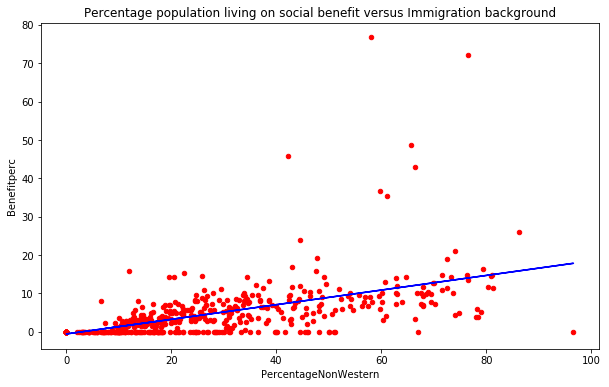

In [43]:
dfbenefits.plot(kind='scatter',x='PercentageNonWestern',y='Benefitperc',figsize=(10, 6), color='red')
plt.title('Percentage population living on social benefit versus Immigration background')
plt.plot(x, fit[0] * x + fit[1], color='blue')
plt.show()

# Create groups of neigbourhouds with high, medium and low percentage of immigrants

For Surinam, Antillean, Turkish and Maroccan population compute three bins of low, medium and high immigration per neighbourhood.

In [44]:
binsSurinam = np.linspace(min(df2["Surinam"]),max(df2["Surinam"]),4)
binsAntillian = np.linspace(min(df2["Antillian"]),max(df2["Antillian"]),4)
binsTurkish = np.linspace(min(df2["Turkish"]),max(df2["Turkish"]),4)
binsMaroccan = np.linspace(min(df2["Maroccan"]),max(df2["Maroccan"]),4)

In [45]:
binsSurinam

array([   0.        ,  530.33333333, 1060.66666667, 1591.        ])

In [46]:
binsAntillian

array([  0., 112., 224., 336.])

In [47]:
binsTurkish

array([   0.        ,  483.33333333,  966.66666667, 1450.        ])

In [48]:
binsMaroccan

array([   0.        ,  792.66666667, 1585.33333333, 2378.        ])

In [49]:
groupNames = ["Low","Medium","High"]

Add the bins to the dataframe

In [50]:
df2['binSurinam'] = pd.cut(df2["Surinam"], binsSurinam,labels=groupNames, include_lowest=True)

In [51]:
df2['binMaroccan'] = pd.cut(df2["Maroccan"], binsMaroccan,labels=groupNames, include_lowest=True)

In [52]:
df2['binAntillian'] = pd.cut(df2["Antillian"], binsAntillian,labels=groupNames, include_lowest=True)

In [53]:
df2['binTurkish'] = pd.cut(df2["Turkish"], binsTurkish,labels=groupNames, include_lowest=True)

Add the neigbourhoods with medium or high population of Turkish, Maroccan, Surinam and Antillian immigrants on a map

Turkish population = blue
Maroccan population = red
Surinam population = green
Antillian population = yellow

In [54]:
df2[450:465]

,Buurt,Surinam,Antillian,Turkish,Maroccan,Other-non-western,Total non-western,Western,Dutch,Total,PercentageNonWestern,lat,lon,binSurinam,binMaroccan,binAntillian,binTurkish
450,T93k Nelson Mandelapark,0,0,0,0,0,0.0,0,0,0.0,NaN,NaN,NaN,Low,Low,Low,Low
451,T94a E-buurt,787,98,95,70,414,1464.0,246,491,2201.0,66.515220,52.326812,4.960241,Medium,Low,Low,Low
452,T94b G-buurt West,1532,211,31,58,965,2797.0,399,542,3738.0,74.826110,52.323296,4.964991,High,Low,Medium,Low
453,T94c Bijlmermuseum Noord,580,139,10,46,1045,1820.0,188,282,2290.0,79.475983,52.324409,4.976328,Medium,Low,Medium,Low
454,T94d Kortvoort,905,250,21,62,644,1882.0,229,520,2631.0,71.531737,52.315025,4.972035,Medium,Low,High,Low
455,T94e Kelbergen,342,45,9,11,239,646.0,85,279,1010.0,63.960396,NaN,NaN,Low,Low,Low,Low
456,T94f K-buurt Midden,598,105,14,103,955,1775.0,211,434,2420.0,73.347107,52.317774,4.987582,Medium,Low,Low,Low
457,T94g K-buurt Zuidoost,433,86,37,41,395,992.0,103,245,1340.0,74.029851,NaN,NaN,Low,Low,Low,Low
458,T94h K-buurt Zuidwest,609,81,27,45,395,1157.0,81,227,1465.0,78.976109,52.311089,4.972255,Medium,Low,Low,Low
459,T94i Grunder/Koningshoef,789,87,32,44,422,1374.0,137,241,1752.0,78.424658,52.323506,4.976832,Medium,Low,Low,Low


In [55]:
dfMaroccan = df2.loc[df2["binMaroccan"] != "Low"]

In [56]:
for lat, lng, numbers in zip(dfMaroccan.lat, dfMaroccan.lon, dfMaroccan.Maroccan):
    folium.features.CircleMarker(
        [lat, lng],
        radius=numbers/50,
        color='red',
        popup="Maroccan population",
        fill = True,
        fill_color='red',
        fill_opacity=0.5
    ).add_to(venues_map)

In [57]:
dfTurkish = df2.loc[df2["binTurkish"] != "Low"]

In [58]:
for lat, lng, numbers in zip(dfTurkish.lat, dfTurkish.lon, dfTurkish.Turkish):
    folium.features.CircleMarker(
        [lat, lng],
        radius=numbers/50,
        color='blue',
        popup="Turkish population",
        fill = True,
        fill_color='blue',
        fill_opacity=0.5
    ).add_to(venues_map)

In [59]:
dfSurinam = df2.loc[df2["binSurinam"] != "Low"]

In [60]:
for lat, lng, numbers in zip(dfSurinam.lat, dfSurinam.lon, dfSurinam.Surinam):
    folium.features.CircleMarker(
        [lat, lng],
        radius=numbers/50,
        color='green',
        popup="Surinam population",
        fill = True,
        fill_color='green',
        fill_opacity=0.5
    ).add_to(venues_map)

In [61]:
dfAntillian = df2.loc[df2["binAntillian"] != "Low"]

In [62]:
dfAntillian[1:10]

,Buurt,Surinam,Antillian,Turkish,Maroccan,Other-non-western,Total non-western,Western,Dutch,Total,PercentageNonWestern,lat,lon,binSurinam,binMaroccan,binAntillian,binTurkish
441,T93b Venserpolder Oost,1041,145,80,122,1011,2399.0,429,627,3455.0,69.435601,52.325598,4.946771,Medium,Low,Medium,Low
442,T93c D-buurt,272,160,27,25,519,1003.0,451,524,1978.0,50.707786,52.322604,4.953480,Low,Low,Medium,Low
443,T93d F-buurt,1534,181,86,129,1092,3022.0,291,549,3862.0,78.249612,52.318899,4.957026,High,Low,Medium,Low
445,T93f Hoptille,380,120,27,63,546,1136.0,187,300,1623.0,69.993839,52.309380,4.954303,Low,Low,Medium,Low
446,T93g Rechte H-buurt,779,156,28,65,1494,2522.0,248,337,3107.0,81.171548,52.311743,4.956983,Medium,Low,Medium,Low
447,T93h Hakfort/Huigenbos,603,151,41,94,1065,1954.0,205,400,2559.0,76.357952,52.306194,4.955474,Medium,Low,Medium,Low
452,T94b G-buurt West,1532,211,31,58,965,2797.0,399,542,3738.0,74.826110,52.323296,4.964991,High,Low,Medium,Low
453,T94c Bijlmermuseum Noord,580,139,10,46,1045,1820.0,188,282,2290.0,79.475983,52.324409,4.976328,Medium,Low,Medium,Low
454,T94d Kortvoort,905,250,21,62,644,1882.0,229,520,2631.0,71.531737,52.315025,4.972035,Medium,Low,High,Low


In [63]:
for lat, lng, numbers in zip(dfAntillian.lat, dfAntillian.lon, dfAntillian.Antillian):
    folium.features.CircleMarker(
        [lat, lng],
        radius=numbers/50,
        color='yellow',
        popup="Antillian population",
        fill = True,
        fill_color='yellow',
        fill_opacity=0.5
    ).add_to(venues_map)

In [64]:
venues_map

# now get some venues specific to the immigrant population in/around Amsterdam

In [65]:
# get some venues in the area
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
# create URL

url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v=20180604&query=Surinam'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude)

results = requests.get(url).json()

In [66]:
#get relevant data from results
# assign relevant part of JSON to venues
venues = results['response']['venues']
# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()


,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d1f7931735', 'name': 'P...",False,4f7da0efe4b08e244de50f87,AMS Airport,NL,Schiphol,Nederland,12050,"[AMS Airport, Schiphol, Nederland]","[{'label': 'display', 'lat': 52.31371942211240...",52.313719,4.758306,NaN,Noord-Holland,Surinam Airways Flight PY993 [AMS - PBM],v-1574796293
1,"[{'id': '4bf58dd8d48988d1f7931735', 'name': 'P...",False,4f8bf55be4b09582a4569725,AMS Airport,NL,Schiphol,Nederland,12446,"[AMS Airport, Schiphol, Nederland]","[{'label': 'display', 'lat': 52.31312370860413...",52.313124,4.751765,NaN,Noord-Holland,Surinam Airways Flight PY994 [PBM - AMS],v-1574796293
2,"[{'id': '4bf58dd8d48988d124941735', 'name': 'O...",False,4dba93f6a86ede8c0f9cf7c6,Weteringschans 165,NL,Amsterdam,Nederland,2240,"[Weteringschans 165, 1017 XD Amsterdam, Nederl...","[{'label': 'display', 'lat': 52.35966440586836...",52.359664,4.891454,1017 XD,Noord-Holland,Surinam Airways,v-1574796293
3,"[{'id': '52f2ab2ebcbc57f1066b8b51', 'name': 'T...",False,5c3a2b2c1cf2e1002cb5dcf7,NaN,NL,Amsterdam,Nederland,163,"[1012 AB Amsterdam, Nederland]","[{'label': 'display', 'lat': 52.37779, 'lng': ...",52.377790,4.898706,1012 AB,Noord-Holland,Tram 11 van CS naar Surinameplein,v-1574796293
4,"[{'id': '4f04b25d2fb6e1c99f3db0c0', 'name': 'T...",False,513b1ad9e4b0a2c58b0d43fe,M Hanenbergstraat 17,NL,NaN,Nederland,6958,"[M Hanenbergstraat 17, Nederland]","[{'label': 'display', 'lat': 52.359396, 'lng':...",52.359396,4.802319,NaN,NaN,Surinam Airways HQ,v-1574796293


In [68]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]
dataframe_filtered[0:10]

,name,categories,address,cc,city,country,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Surinam Airways Flight PY993 [AMS - PBM],Plane,AMS Airport,NL,Schiphol,Nederland,12050,"[AMS Airport, Schiphol, Nederland]","[{'label': 'display', 'lat': 52.31371942211240...",52.313719,4.758306,NaN,Noord-Holland,4f7da0efe4b08e244de50f87
1,Surinam Airways Flight PY994 [PBM - AMS],Plane,AMS Airport,NL,Schiphol,Nederland,12446,"[AMS Airport, Schiphol, Nederland]","[{'label': 'display', 'lat': 52.31312370860413...",52.313124,4.751765,NaN,Noord-Holland,4f8bf55be4b09582a4569725
2,Surinam Airways,Office,Weteringschans 165,NL,Amsterdam,Nederland,2240,"[Weteringschans 165, 1017 XD Amsterdam, Nederl...","[{'label': 'display', 'lat': 52.35966440586836...",52.359664,4.891454,1017 XD,Noord-Holland,4dba93f6a86ede8c0f9cf7c6
3,Tram 11 van CS naar Surinameplein,Tram Station,NaN,NL,Amsterdam,Nederland,163,"[1012 AB Amsterdam, Nederland]","[{'label': 'display', 'lat': 52.37779, 'lng': ...",52.377790,4.898706,1012 AB,Noord-Holland,5c3a2b2c1cf2e1002cb5dcf7
4,Surinam Airways HQ,Travel Lounge,M Hanenbergstraat 17,NL,NaN,Nederland,6958,"[M Hanenbergstraat 17, Nederland]","[{'label': 'display', 'lat': 52.359396, 'lng':...",52.359396,4.802319,NaN,NaN,513b1ad9e4b0a2c58b0d43fe
5,Surinameplein,Plaza,NaN,NL,Amsterdam,Nederland,4040,"[Amsterdam, Nederland]","[{'label': 'display', 'lat': 52.35807834097373...",52.358078,4.851070,NaN,Noord-Holland,51137638e4b046710f76794e
6,Mr. J - Taste of Surinam,Cajun / Creole Restaurant,Bijlmerplein 516a,NL,Amsterdam,Nederland,8093,"[Bijlmerplein 516a, Amsterdam, Nederland]","[{'label': 'display', 'lat': 52.31469517479858...",52.314695,4.954378,NaN,Noord-Holland,4ebbb474f7903b1fae9b7ae2
7,Surinamekade,Road,Surinamekade,NL,Amsterdam,Nederland,2933,"[Surinamekade, Amsterdam, Nederland]","[{'label': 'display', 'lat': 52.37762955773032...",52.377630,4.942517,NaN,Noord-Holland,4cdf972869136dcba0a4dee6
8,Surinameplein,Road,surinameplein,NL,Amsterdam,Nederland,3913,"[surinameplein, 1058 Amsterdam, Nederland]","[{'label': 'display', 'lat': 52.35839613921804...",52.358396,4.852996,1058,Noord-Holland,4c9e315846978cfad4149f7f
9,Surinamestraat,Other Great Outdoors,NaN,NL,Amsterdam,Nederland,4056,"[Amsterdam, Nederland]","[{'label': 'display', 'lat': 52.35803931869849...",52.358039,4.850839,NaN,Noord-Holland,4c9fb4dd7c096dcb8ef2e0d1


In [69]:
# add circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='green',
        popup=label,
        fill = True,
        fill_color='black',
        fill_opacity=1
    ).add_to(venues_map)

In [70]:
venues_map

In [71]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v=20180604&query=Marokkaans'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude)

results = requests.get(url).json()


In [73]:
#get relevant data from results
# assign relevant part of JSON to venues
venues = results['response']['venues']
# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d1c3941735', 'name': 'M...",False,50254d96e4b06497245befad,NaN,NL,NaN,Nederland,2421,[Nederland],"[{'label': 'display', 'lat': 52.35744057468344...",52.357441,4.899221,NaN,NaN,Marokkaans eetcafe Noumidia,v-1574796324
1,"[{'id': '4bf58dd8d48988d118951735', 'name': 'G...",False,4de10905ae605835c461c909,Frederik Hendrikstraat 108,NL,Amsterdam,Nederland,1805,"[Frederik Hendrikstraat 108, Amsterdam, Nederl...","[{'label': 'display', 'lat': 52.375453, 'lng':...",52.375453,4.873579,NaN,Noord-Holland,Marokkaanse Supermarkt Zonder Naam,v-1574796324
2,"[{'id': '4bf58dd8d48988d16a941735', 'name': 'B...",False,4e58f502b61c4aaa3df63093,NaN,NL,NaN,Nederland,7459,[Nederland],"[{'label': 'display', 'lat': 52.35527561263613...",52.355276,4.796919,NaN,NaN,Marokkaanse bakkerij osdorp,v-1574796324
3,"[{'id': '4bf58dd8d48988d138941735', 'name': 'M...",False,571a152c498ef3d5588951b9,"Zoetestraat 2, 2011 PR Haarlem",NL,NaN,Nederland,18028,"[Zoetestraat 2, 2011 PR Haarlem, Nederland]","[{'label': 'display', 'lat': 52.38351095475461...",52.383511,4.634209,NaN,NaN,Stg. Moskee voor Marokkaanse en andere Islamieten,v-1574796324
4,"[{'id': '4bf58dd8d48988d129941735', 'name': 'C...",False,4fc4a665e4b0d9d21ec510e9,NaN,NL,Utrecht,Nederland,34723,"[Utrecht, Nederland]","[{'label': 'display', 'lat': 52.08937659514747...",52.089377,5.087807,NaN,Utrecht,Marokkaanse Consulaat,v-1574796324


In [74]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]
dataframe_filtered[0:10]

,name,categories,address,cc,city,country,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Marokkaans eetcafe Noumidia,Moroccan Restaurant,NaN,NL,NaN,Nederland,2421,[Nederland],"[{'label': 'display', 'lat': 52.35744057468344...",52.357441,4.899221,NaN,NaN,50254d96e4b06497245befad
1,Marokkaanse Supermarkt Zonder Naam,Grocery Store,Frederik Hendrikstraat 108,NL,Amsterdam,Nederland,1805,"[Frederik Hendrikstraat 108, Amsterdam, Nederl...","[{'label': 'display', 'lat': 52.375453, 'lng':...",52.375453,4.873579,NaN,Noord-Holland,4de10905ae605835c461c909
2,Marokkaanse bakkerij osdorp,Bakery,NaN,NL,NaN,Nederland,7459,[Nederland],"[{'label': 'display', 'lat': 52.35527561263613...",52.355276,4.796919,NaN,NaN,4e58f502b61c4aaa3df63093
3,Stg. Moskee voor Marokkaanse en andere Islamieten,Mosque,"Zoetestraat 2, 2011 PR Haarlem",NL,NaN,Nederland,18028,"[Zoetestraat 2, 2011 PR Haarlem, Nederland]","[{'label': 'display', 'lat': 52.38351095475461...",52.383511,4.634209,NaN,NaN,571a152c498ef3d5588951b9
4,Marokkaanse Consulaat,City Hall,NaN,NL,Utrecht,Nederland,34723,"[Utrecht, Nederland]","[{'label': 'display', 'lat': 52.08937659514747...",52.089377,5.087807,NaN,Utrecht,4fc4a665e4b0d9d21ec510e9
5,Marokkaanse eethuis Royal,None,Kanaalstraat,NL,Utrecht,Nederland,35123,"[Kanaalstraat, Utrecht, Nederland]","[{'label': 'display', 'lat': 52.08969998279009...",52.089700,5.104369,NaN,Utrecht,4d387b9c803ba35d376c9cfc
6,Tajine Marokkaans Restaurant,Restaurant,Kamp 43 2,NL,Lelystad,Nederland,42294,"[Kamp 43 2, 8225 HS Lelystad, Nederland]","[{'label': 'display', 'lat': 52.50176, 'lng': ...",52.501760,5.489380,8225 HS,Flevoland,58b9b1b34f1069627362692e
7,Dagverzorging Marhaban AxionContinu voor Marok...,Medical Center,De Gasperilaan 116 118,NL,Utrecht,Nederland,36310,"[De Gasperilaan 116 118, 3527 GH Utrecht, Nede...","[{'label': 'display', 'lat': 52.07493, 'lng': ...",52.074930,5.091360,3527 GH,Utrecht,55d4fbd8498eab8ca686be9f


In [75]:
# add circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='red',
        popup=label,
        fill = True,
        fill_color='black',
        fill_opacity=1
    ).add_to(venues_map)

In [76]:
venues_map

In [77]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v=20180604&query=Turks'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude)

results = requests.get(url).json()


In [78]:
#get relevant data from results
# assign relevant part of JSON to venues
venues = results['response']['venues']
# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,[],False,4e0c79cfc65bd1c17b6e22bb,Van der Pekstraat 92,NL,Amsterdam,Nederland,NaN,1377,"[Van der Pekstraat 92, Amsterdam, Nederland]","[{'label': 'display', 'lat': 52.38960549999999...",52.389605,4.910385,NaN,Noord-Holland,Turks Visrestaurant,v-1574796396
1,"[{'id': '4f04af1f2fb6e1c99f3db0bb', 'name': 'T...",False,4a270786f964a5201c8e1fe3,Jan van Galenstraat 204,NL,Amsterdam,Nederland,NaN,1945,"[Jan van Galenstraat 204, 1056 CK Amsterdam, N...","[{'label': 'display', 'lat': 52.36471284, 'lng...",52.364713,4.883382,1056 CK,Noord-Holland,Turks Eethuis Restaurant Mesken 2,v-1574796396
2,"[{'id': '4bf58dd8d48988d16a941735', 'name': 'B...",False,4dce72467d8b975f18cdfde4,De clercqstraat 81,NL,Amsterdam,Nederland,NaN,2369,"[De clercqstraat 81, Amsterdam, Nederland]","[{'label': 'display', 'lat': 52.37048, 'lng': ...",52.370480,4.867623,NaN,Noord-Holland,Turks Pizza Joint,v-1574796396
3,"[{'id': '4f04af1f2fb6e1c99f3db0bb', 'name': 'T...",False,4a270789f964a5202d8e1fe3,Jan Pieter Heijestraat 170-172,NL,Amsterdam,Nederland,NaN,3085,"[Jan Pieter Heijestraat 170-172, 1054 ML Amste...","[{'label': 'display', 'lat': 52.36106938092172...",52.361069,4.865087,1054 ML,Noord-Holland,Turks Restaurant Aspendos,v-1574796396
4,"[{'id': '4bf58dd8d48988d16e941735', 'name': 'F...",False,4a27082af964a520c48f1fe3,Jan Hanzenstraat 17-19,NL,Amsterdam,Nederland,NaN,2543,"[Jan Hanzenstraat 17-19, 1053 SJ Amsterdam, Ne...","[{'label': 'display', 'lat': 52.36825375, 'lng...",52.368254,4.866573,1053 SJ,Noord-Holland,Empoli Ideaal Turks Special Fastfood,v-1574796396


In [79]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]
dataframe_filtered[0:10]

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Turks Visrestaurant,None,Van der Pekstraat 92,NL,Amsterdam,Nederland,NaN,1377,"[Van der Pekstraat 92, Amsterdam, Nederland]","[{'label': 'display', 'lat': 52.38960549999999...",52.389605,4.910385,NaN,Noord-Holland,4e0c79cfc65bd1c17b6e22bb
1,Turks Eethuis Restaurant Mesken 2,Turkish Restaurant,Jan van Galenstraat 204,NL,Amsterdam,Nederland,NaN,1945,"[Jan van Galenstraat 204, 1056 CK Amsterdam, N...","[{'label': 'display', 'lat': 52.36471284, 'lng...",52.364713,4.883382,1056 CK,Noord-Holland,4a270786f964a5201c8e1fe3
2,Turks Pizza Joint,Bakery,De clercqstraat 81,NL,Amsterdam,Nederland,NaN,2369,"[De clercqstraat 81, Amsterdam, Nederland]","[{'label': 'display', 'lat': 52.37048, 'lng': ...",52.370480,4.867623,NaN,Noord-Holland,4dce72467d8b975f18cdfde4
3,Turks Restaurant Aspendos,Turkish Restaurant,Jan Pieter Heijestraat 170-172,NL,Amsterdam,Nederland,NaN,3085,"[Jan Pieter Heijestraat 170-172, 1054 ML Amste...","[{'label': 'display', 'lat': 52.36106938092172...",52.361069,4.865087,1054 ML,Noord-Holland,4a270789f964a5202d8e1fe3
4,Empoli Ideaal Turks Special Fastfood,Fast Food Restaurant,Jan Hanzenstraat 17-19,NL,Amsterdam,Nederland,NaN,2543,"[Jan Hanzenstraat 17-19, 1053 SJ Amsterdam, Ne...","[{'label': 'display', 'lat': 52.36825375, 'lng...",52.368254,4.866573,1053 SJ,Noord-Holland,4a27082af964a520c48f1fe3
5,Lunchroom Turks Fruit,Snack Place,Beukenplein 1W,NL,Amsterdam,Nederland,Tweede Oosterparkstraat,2728,"[Beukenplein 1W (Tweede Oosterparkstraat), 109...","[{'label': 'display', 'lat': 52.35744692945263...",52.357447,4.917963,1092 BA,Noord-Holland,4d04e2fd30a58cfad643a2e7
6,Tekin Turks Specialiteiten Restaurant,None,Kinkerstraat 363,NL,Amsterdam,Nederland,NaN,3152,"[Kinkerstraat 363, 1053 EX Amsterdam, Nederland]","[{'label': 'display', 'lat': 52.36458405042798...",52.364584,4.859691,1053 EX,Noord-Holland,4a27db76f964a520f2931fe3
7,Lila Turks Specialiteiten restaurant,Middle Eastern Restaurant,NaN,NL,NaN,Nederland,NaN,3084,[Nederland],"[{'label': 'display', 'lat': 52.36440299129884...",52.364403,4.861040,NaN,NaN,4ed525280aafb9162753e0a4
8,Sendar Simit Turks Eethuis,Turkish Restaurant,NaN,NL,NaN,Nederland,NaN,3371,[Nederland],"[{'label': 'display', 'lat': 52.36486153963068...",52.364862,4.855728,NaN,NaN,51cc7be8498ea3a930e46346
9,Turks Eethuis Mevsim,None,Johan Huizingalaan 294,NL,Amsterdam,Nederland,NaN,5701,"[Johan Huizingalaan 294, 1065 JN Amsterdam, Ne...","[{'label': 'display', 'lat': 52.33152087913132...",52.331521,4.868740,1065 JN,Noord-Holland,4a27db64f964a52088931fe3


In [80]:
# add circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='black',
        fill_opacity=1
    ).add_to(venues_map)

In [81]:
venues_map

## find out the dependancy between number of restaurants and other sectors in each neighbourhood.

In [82]:
dftest = dfsectors[0:70]

In [83]:
dftest[0:5]

,Buurt,Offices,Retail,Services,Restaurants,Companies,Other,Total,lat,lon
0,A00a Kop Zeedijk,122,41,64,122,39,23,411,52.375434,4.901248
1,A00b Oude Kerk e.o.,151,59,47,71,38,83,449,52.374681,4.897488
2,A00c Burgwallen Oost,183,70,95,92,74,87,601,52.373197,4.891966
3,A00d Nes e.o.,93,28,37,57,26,6,247,52.371013,4.893594
4,A00e BG-terrein e.o.,82,31,64,18,19,12,226,52.369224,4.894691


In [84]:
dfx= dftest[["Offices","Retail","Services","Companies","Restaurants"]]

In [85]:
dfx[0:5]

,Offices,Retail,Services,Companies,Restaurants
0,122,41,64,39,122
1,151,59,47,38,71
2,183,70,95,74,92
3,93,28,37,26,57
4,82,31,64,19,18


Check for linear dependency between independent variables (offices, retail, services and companies) versus dependent variable (restaurant locations) using scatter plots

simply substitute any of the independent variables in the x variable below.

In [ ]:
# substitute Retail with Services, Companies, Offices and Others
x1 = dfx['Retail']
y1 = dfx['Restaurants']
fit1 = np.polyfit(x1,y1, 1)
fit1

<function matplotlib.pyplot.show(*args, **kw)>

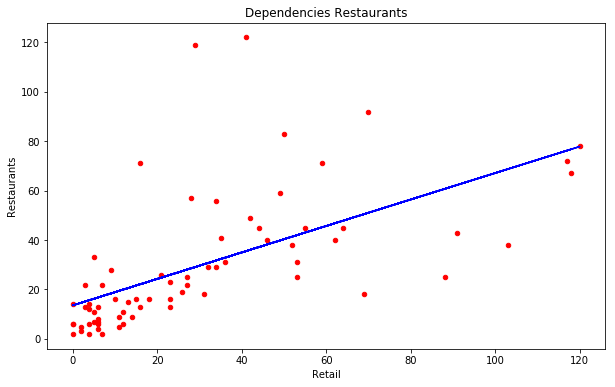

In [89]:
dfx.plot(kind='scatter',x='Retail',y='Restaurants',figsize=(10, 6), color='red')
plt.title('Dependencies Restaurants')
plt.plot(x1, fit1[0] * x1 + fit1[1], color='blue')
plt.show

# divide the neighbourhoods outside the city with retail outlets in small, medium, large ( number of retail outlets )

select the neigbourhoods outside the city, hence skip the first 68 neighbourhoods (starting with Axx)

In [93]:
dfsectors.shape

(481, 10)

In [94]:
maxrow = len(dfsectors.index)

In [95]:
dfsectorsoutsidecity = dfsectors[70:maxrow]

In [96]:
dfsectorsoutsidecity[0:10]

,Buurt,Offices,Retail,Services,Restaurants,Companies,Other,Total,lat,lon
70,B10a Coenhaven/Mercuriushaven,222,20,19,22,251,9,543,52.410204,4.866126
71,B10b Alfa-driehoek,216,6,25,4,123,4,378,52.414834,4.824705
72,B10c Petroleumhaven,9,1,1,0,41,0,52,52.412367,4.856987
73,B10d Westhaven Noord,46,2,4,2,132,0,186,NaN,NaN
74,B10e Vervoerscentrum,40,6,5,0,59,0,110,NaN,NaN
75,B10f Amerikahaven,28,5,6,2,135,1,177,NaN,NaN
76,B10g Afrikahaven,5,1,9,1,21,0,37,NaN,NaN
77,B10h Westhaven Zuid,19,1,7,0,42,1,70,NaN,NaN
78,E12a Houthavens West,130,0,46,3,31,3,213,52.396484,4.872268
79,E12b Houthavens Oost,114,2,25,7,32,2,182,52.393192,4.883940


determine the bins of retail outlets (numbers of) for neighbourhoofd

In [98]:
binsRetail = np.linspace(min(dfsectorsoutsidecity["Retail"]),max(dfsectorsoutsidecity["Retail"]),4)
binsRetail

array([  0.        ,  57.33333333, 114.66666667, 172.        ])

In [99]:
groupNames2 =  ["Very Low", "Low", "Medium", "High"]

In [100]:
dfsectorsoutsidecity['binRetail'] = pd.cut(dfsectorsoutsidecity["Retail"],binsRetail,labels=groupNames, include_lowest=True)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Select those areas with some retail outlets to begin with

In [102]:
areasofinterest = dfsectorsoutsidecity.loc[dfsectorsoutsidecity["binRetail"] != "Low"]

In [103]:
areasofinterest[0:100]

,Buurt,Offices,Retail,Services,Restaurants,Companies,Other,Total,lat,lon,binRetail
101,E17a Da Costabuurt Noord,343,87,281,63,121,15,910,52.372204,4.871856,Medium
103,E18b Bellamybuurt Zuid,254,77,177,62,92,22,684,52.366116,4.864403,Medium
172,F81c Osdorpplein e.o.,80,92,49,24,101,11,357,52.358713,4.806071,Medium
222,K24e Sarphatiparkbuurt,384,172,230,101,154,27,1068,52.354499,4.896443,High
243,K47b P.C. Hooftbuurt,179,99,44,18,37,3,380,52.360296,4.880114,Medium
244,K47c Concertgebouwbuurt,222,67,103,21,38,6,457,52.356522,4.879146,Medium
245,K47d Cornelis Schuytbuurt,348,74,112,20,58,9,621,52.354745,4.871804,Medium
279,K90a Gelderlandpleinbuurt,178,87,91,19,59,18,452,52.331085,4.877696,Medium
402,N69j Buikslotermeerplein,46,82,27,16,40,11,222,52.398007,4.936623,Medium
444,T93e Amsterdamse Poort,44,100,40,40,24,4,252,52.314165,4.952021,Medium


In [112]:
for lat, lng, numbers, area in zip(areasofinterest.lat, areasofinterest.lon, areasofinterest.Retail, areasofinterest.Buurt):
    folium.features.CircleMarker(
        [lat, lng],
        radius=numbers/10,
        color='orange',
        popup=area,
        fill = True,
        fill_color='orange',
        fill_opacity=0.5
    ).add_to(venues_map)

In [113]:
venues_map